In [2]:
#data collection
import pandas as pd
dataset=pd.read_csv("insurance_pre.csv")
#data preprocessed
dataset=pd.get_dummies(dataset,drop_first=True)
dataset=dataset.astype(int)
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
dependent=dataset[['charges']]
#train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [3]:
#model creation
from sklearn.ensemble import GradientBoostingRegressor
Regressor=GradientBoostingRegressor()
Regressor.fit(xtrain,ytrain)

C:\Users\sulth\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor()

In [4]:
ypred=Regressor.predict(xtest)

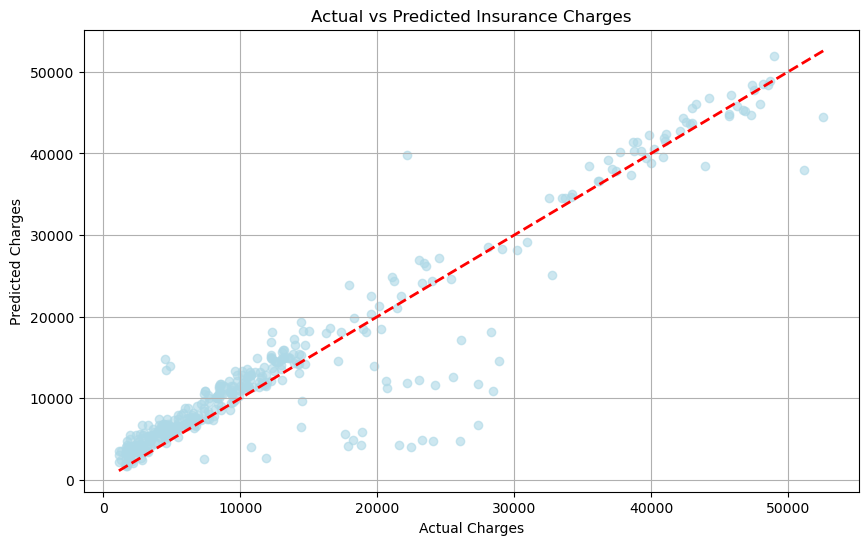

In [5]:
#plot creation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred, color='lightblue', alpha =0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Insurance Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

In [6]:
#evaluation metrics
ypred=Regressor.predict(xtest)
from sklearn.metrics import r2_score
rscore=r2_score(ytest,ypred)
rscore

0.8875255749847211

In [7]:
#save the model
import pickle
filename="finalized_model_insurance-RF.sav"
pickle.dump(Regressor,open(filename,'wb'))

In [8]:
#deployment - load and check
import pickle
loaded_model=pickle.load(open("finalized_model_insurance-RF.sav",'rb'))
result=loaded_model.predict([[19,27,0,0,1]])
result

C:\Users\sulth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([17640.41484278])